# F-Distribution and Multiple Hypothesis Testing

### ANOVA - Analysis of Variance
- Method of comparing more than two sample means.  If only two samples being compared then use a t-test.
- Theory: Uses F-Distribution
- Assumptions:
    - samples are independent of each other - measures are not repeated in other samples
    - must have equal sample size
    - dependent variable (target/y) must be normally distributed
    - sample variance must be approximately equal for each sample
    
### Types of Test
1.  One-Way ANOVA - think of two columns of data - one being a categorical (aka factor) and the other being continuous.  The categorical variable divides the data into two or more groups.  
1.  Two-Way (factorial) ANOVA - works like a one-way except that it has two or more categorical columns (aka factors).

### Testing
- Uses the F-distribution and the null hypothesis is that all the means are the same and the experimental hypothesis is that at least one factor is likely outside the probability of random occurance (p-value < 0.05)  
- If null hypothesis is rejected then post-hoc tests need to be conducted to determine which factors are significantly different.  

### Concept
- What we are really testing is whether the proportion of variances are different.  So the F-value is the ratio of two variances divided by their degrees of freedom.  This makes it so independent of how many samples there are there is a standard value for small samples and large samples.
- Another way of looking at it is that if there is no variance then the means must be equal and the more the means differ then the larger the variance will be.  
- Interesting enough, if you look at the F-distribution (density function) below, it's shape is determined by the number of degrees of freedom of each sample.  Essentially, the F-distribution was developed from data of the ratio of variances   
- $ F-statistic = \frac{between-groups-variance}{within-groups-variance} = \frac{global-variance}{group-variance-not-explained-by-model}$  
- The F-statistics is comparing the variance between the samples divided by the variance within each sample.  If the F-statistic is much greater than 1 then at least one sample has an unequal mean.  If the F-statistic is less than one then there is more variation within the samples and the samples can not be definitely assessed as having different means. 
- Analysis of CoVariance can improve the test by explaining how factors explain more of the variance and thus reducing the unexplained variance.   


In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

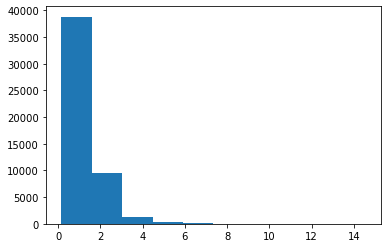

In [2]:
# Generate numbers from the f-distribution
dfn=30
dfd = 10
r = stats.f.rvs(dfn, dfd, size=50000)
plt.hist(r);

In [3]:
r = np.random.normal(loc=0, scale=1, size=50000)
r1, r2, r3, r4 = r[0:12499], r[12500:24999], r[25000:37499], r[37500: 49999]
print(len(r1), len(r2), len(r3), len(r4))

12499 12499 12499 12499


Skewness: 0.004
Wilks-Shapiro:  Normal




C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


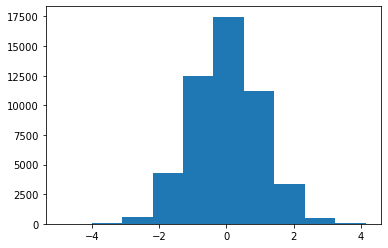

In [4]:
plt.hist(r);
print(f'Skewness: {stats.skew(r):0.3f}')
print('Wilks-Shapiro: ', 'Normal' if stats.shapiro(r).pvalue > 0.05 else 'Not Normal')
print("\n")

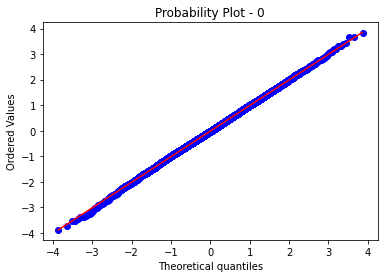

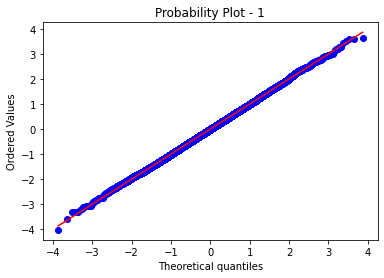

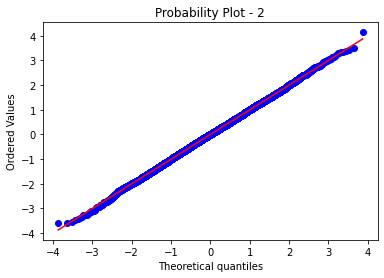

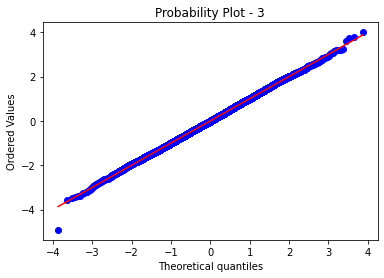

In [5]:
for index, major in enumerate([r1, r2, r3, r4]):
    stats.probplot(major, dist="norm", plot=plt)
    plt.title(f"Probability Plot - {index}")
    plt.show()

In [6]:
# equal variance min/max comparision
# value close to one means homoscedascity

ratio = max([ np.var(i) for i in [r1, r2, r3, r4] ])/min([ np.var(i) for i in [r1, r2, r3, r4] ])
ratio

1.0079024306749977

In [7]:
# equal variance hypothesis test
stats.levene(r1, r2, r3, r4)

LeveneResult(statistic=0.3778759488075126, pvalue=0.7689633755216287)

## One-way ANOVA

In [8]:
stats.f_oneway(r1, r2, r3, r4)

F_onewayResult(statistic=0.9403230277367092, pvalue=0.4200680558970593)

- Reject equal means since pvalue < 0.05

## Two-way ANOVA - 2 Factors, 1 Target

In [9]:
# Only have one continuous variable and multiple categorical variables
# Samples (aka factors aka column data) must be the same length

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.datasets import make_s_curve
import pandas as pd

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Non-linear Data - S-Curve

In [11]:
three_columns, color = make_s_curve(500)

In [12]:
three_columns

array([[-0.38198369,  1.56300577,  0.07583094],
       [-0.997262  ,  1.70209128, -1.07394935],
       [ 0.043864  ,  0.041701  ,  1.99903751],
       ...,
       [-0.78848444,  1.0489761 ,  0.3849453 ],
       [ 0.78771798,  0.98219755, -0.38396397],
       [ 0.97319651,  1.69680575, -0.77002489]])

In [13]:
df = pd.DataFrame(three_columns, columns=["alpha", "beta", "gamma"])
df = df.sort_values(by=['gamma'])
df = df[(-1 < df['gamma']) & (df['gamma'] < 1)] 
df.head()

,alpha,beta,gamma
374,0.999297,1.112020,-0.962512
322,0.997418,0.711441,-0.928188
85,0.996527,0.618552,-0.916728
400,0.995940,1.261778,-0.909981
208,0.995693,0.279028,-0.907287


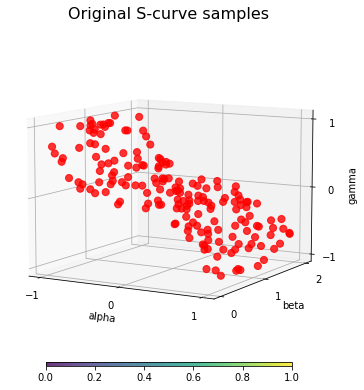

In [19]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import mpl_toolkits.mplot3d 

def plot_3d(points, points_color, title, save=None):
    x, y, z = points  #points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_xlabel('alpha')
    ax.set_ylabel('beta')
    ax.set_zlabel('gamma')

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()
    
    if save:
        fig.savefig(f'./images/{save}_{datetime.today().strftime("%Y_%m_%d")}_{random.randint(10, 99)}')
    
plot_3d([df['alpha'], df['beta'], df['gamma']], 'red', "Original S-curve samples")

In [15]:
df['alpha_'] = pd.qcut(df['alpha'], q=3, labels=['low', 'medium', 'high'])
df['beta_'] = pd.qcut(df['beta'], q=3, labels=['low', 'medium', 'high'])

In [16]:
df['color'] = df['alpha']*df['beta']*100
df.head()

,alpha,beta,gamma,alpha_,beta_,color
374,0.999297,1.112020,-0.962512,high,medium,111.123806
322,0.997418,0.711441,-0.928188,high,low,70.960445
85,0.996527,0.618552,-0.916728,high,low,61.640335
400,0.995940,1.261778,-0.909981,high,medium,125.665569
208,0.995693,0.279028,-0.907287,high,low,27.782654


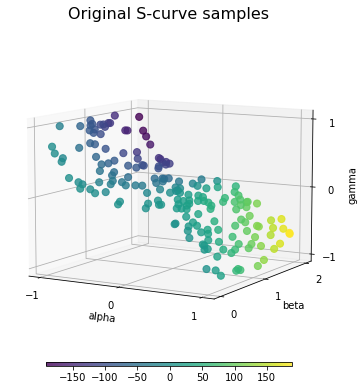

In [20]:
plot_3d([df['alpha'], df['beta'], df['gamma']], df['color'], "Original S-curve samples", save="anova_data")

In [20]:
# Performing two-way ANOVA
model = ols('gamma ~ C(alpha_) + C(beta_) +\
C(alpha_):C(beta_)',
            data=df).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                       df     sum_sq    mean_sq           F        PR(>F)
C(alpha_)             2.0  30.983656  15.491828  307.349759  5.169359e-55
C(beta_)              2.0   0.094317   0.047158    0.935595  3.945286e-01
C(alpha_):C(beta_)    4.0   0.066281   0.016570    0.328745  8.583463e-01
Residual            157.0   7.913515   0.050405         NaN           NaN


* By visual inspection of the 3D plot, we can see that alpha and gamma are negatively correlated and beta and gamma seem to have no correlation.
* After binning the data into low, medium, and high groups for the alpha and beta groups - essentially reducing the granularity aka compressing - the test shows only alpha is significant to the models performance.


## Two-way ANOVA - 3 Factors, 1 Target

In [21]:
df.head()

,alpha,beta,gamma,alpha_,beta_,color
123,0.999992,0.297969,-0.996065,high,low,29.796661
12,0.999945,1.189816,-0.989510,high,medium,118.975063
476,0.999901,0.555332,-0.985899,high,low,55.527676
373,0.999885,0.925873,-0.984851,high,medium,92.576676
48,0.998502,1.082148,-0.945291,high,medium,108.052707


In [22]:
df['gamma_'] = pd.qcut(df['gamma'], q=2, labels=['male', 'female'])

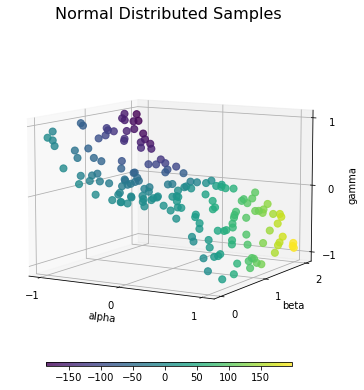

In [23]:
plot_3d([df['alpha'], df['beta'], df['gamma']], df['color'], "Normal Distributed Samples")

#### From the plot we can see that there is a relationship between: 
* gamma and color (negative correlation with not much noise), 
* beta and color don't seem correlated, 
* alpha and color seem correlated (positively correlated but with noise)  

**Remember, 'color' was developed by multipling alpha and beta together**

In [24]:
# Performing two-way ANOVA
model = ols('color ~ C(alpha_) + C(beta_) + C(gamma_) + C(alpha_):C(beta_) + C(alpha_):C(gamma_) + C(beta_):C(gamma_) ',
            data=df).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                        df         sum_sq        mean_sq           F  \
C(alpha_)              2.0  885799.231573  442899.615786  807.241938   
C(beta_)               2.0    1536.459112     768.229556    1.400198   
C(gamma_)              1.0   22916.168404   22916.168404   41.767686   
C(alpha_):C(beta_)     4.0  274340.784876   68585.196219  125.005407   
C(alpha_):C(gamma_)    2.0     211.233676     105.616838    0.192500   
C(beta_):C(gamma_)     2.0    8856.304031    4428.152016    8.070881   
Residual             154.0   84493.306895     548.657837         NaN   

                           PR(>F)  
C(alpha_)            2.364887e-82  
C(beta_)             2.496690e-01  
C(gamma_)            1.283031e-09  
C(alpha_):C(beta_)   2.604388e-47  
C(alpha_):C(gamma_)  8.250922e-01  
C(beta_):C(gamma_)   4.641456e-04  
Residual                      NaN  


#### Analysis
* Notice that only alpha, gamma, and alpha/beta pair interaction show a strong relation. Beta does not show significance.  This matches the graphical interpretation from above.
* The alpha/gamma and beta/gamma interactions show moderate significance. Since gamma can only be male or female, I wonder if this skews the results.  There is no meaning to the data so there is no further interpretation outside of analyzing the graph.

## Two-way ANOVA - 3 Factors, 1 Target

In [25]:
r = np.random.normal(loc=0, scale=1, size=50000)
r1, r2, r3, r4 = r[0:12499], r[12500:24999], r[25000:37499], r[37500: 49999]
print(len(r1), len(r2), len(r3), len(r4))

12499 12499 12499 12499


In [26]:
data = [r1, r2, r3, r4]

In [27]:
df1 = pd.DataFrame(data).transpose()
df1.columns=['alpha', 'beta', 'gamma', 'zed']
df1.head()

,alpha,beta,gamma,zed
0,-0.499739,0.030716,2.890146,0.227310
1,-0.778765,0.859766,1.696802,-1.485445
2,0.495066,0.251985,0.126985,-0.831434
3,-0.878095,-1.756534,1.330024,-1.274152
4,0.967299,0.512402,-0.567350,1.947667


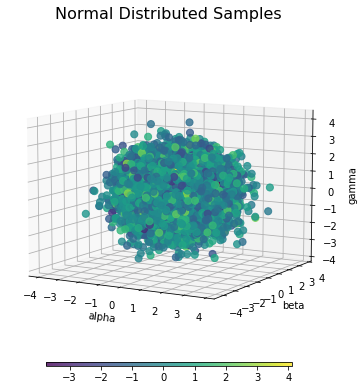

In [28]:
plot_3d([df1['alpha'], df1['beta'], df1['gamma']], df1['zed'], "Normal Distributed Samples")

In [29]:
df1['alpha_'] = pd.qcut(df1['alpha'], q=3, labels=['low', 'medium', 'high'])
df1['beta_'] = pd.qcut(df1['beta'], q=3, labels=['low', 'medium', 'high'])
df1['gamma_'] = pd.qcut(df1['gamma'], q=2, labels=['male', 'female'])

In [30]:
df1.head()

,alpha,beta,gamma,zed,alpha_,beta_,gamma_
0,-0.499739,0.030716,2.890146,0.227310,low,medium,female
1,-0.778765,0.859766,1.696802,-1.485445,low,high,female
2,0.495066,0.251985,0.126985,-0.831434,high,medium,female
3,-0.878095,-1.756534,1.330024,-1.274152,low,low,female
4,0.967299,0.512402,-0.567350,1.947667,high,high,male


In [31]:
# Performing two-way ANOVA
model = ols('zed ~ C(alpha_) + C(beta_) + C(gamma_) + C(alpha_):C(beta_) + C(alpha_):C(gamma_) + C(beta_):C(gamma_) ',
            data=df1).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)

                          df        sum_sq   mean_sq         F    PR(>F)
C(alpha_)                2.0      1.024497  0.512249  0.504475  0.603835
C(beta_)                 2.0      0.553070  0.276535  0.272338  0.761601
C(gamma_)                1.0      0.376007  0.376007  0.370301  0.542852
C(alpha_):C(beta_)       4.0      5.275301  1.318825  1.298811  0.267909
C(alpha_):C(gamma_)      2.0      0.541320  0.270660  0.266552  0.766020
C(beta_):C(gamma_)       2.0      0.083348  0.041674  0.041041  0.959789
Residual             12485.0  12677.389398  1.015410       NaN       NaN


* None of these show any significance to the model which makes sense.

### ANCOVA - Analysis of Covariance

In [32]:
# Try this method in the future
# https://www.geeksforgeeks.org/how-to-perform-an-ancova-in-python/
# from pingouin import ancova
# ancova(data=data, dv='test_score', covar='current_grade', between='methodology')

In [33]:
# Perform the ANCOVA
model = ols('zed ~ C(alpha_) + C(beta_) + C(gamma_) + C(alpha_):C(beta_) + C(alpha_):C(gamma_) + C(beta_):C(gamma_) ',
            data=df1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    zed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5950
Date:                Sun, 30 Apr 2023   Prob (F-statistic):              0.860
Time:                        17:30:12   Log-Likelihood:                -17824.
No. Observations:               12499   AIC:                         3.568e+04
Df Residuals:                   12485   BIC:                         3.578e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------